In [24]:
# Libraries to start any project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# I try to do all related work in a single section
# Here it includes basic steps need to start with data preprocessing
data = pd.read_csv("spam.csv", encoding="latin1")
data.head()
data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)
data.head()
data.rename(columns={"v1": "label", "v2": "text"}, inplace=True)
data.head()
data.isnull().sum()
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})
print(data.head(),'\n\n',data['label'].value_counts())


   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro... 

 label
0    4516
1     653
Name: count, dtype: int64


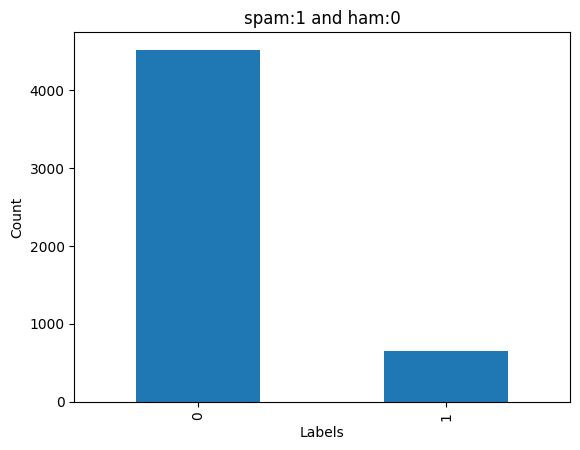

In [26]:
# Visualizing Data
data_copy = data.copy()
data_copy['label'].value_counts().plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('spam:1 and ham:0')
plt.show()

In [27]:
# Importing libraries for preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
# Process for data-preprocessing needed
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    ps = PorterStemmer()
    stemmed_text = [ps.stem(word) for word in filtered_text]
    return ' '.join(stemmed_text)
data['text'] = data['text'].apply(preprocess_text)

In [29]:
# data after preprocessing
data

,label,text
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though
...,...,...
5567,1,2nd time tri 2 contact u u å 750 pound prize 2...
5568,0,ì_ b go esplanad fr home
5569,0,piti mood suggest
5570,0,guy bitch act like interest buy someth els nex...


In [30]:
# Now comes the breaking the dataset for train and test datasets
X = data['text']
y = data['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(2228                                         exact intent
 5529                                                  one
 2149                           waaaat lololo ok next time
 5058    free video camera phone half price line rental...
 5051    tick tick tick could die loneli know pout stom...
                               ...                        
 4740            mani happi return day wish happi birthday
 474     nice line said broken heart plz cum 1 time inf...
 3266                               ok come n pick u engin
 4016    eek lot time especi sinc american pie like 8 m...
 879     u secret admir look 2 make contact u find r re...
 Name: text, Length: 4135, dtype: object,
 1617                                 u download fring app
 2064    pass di ur contact n see wat u get red luv wid...
 1272                                                   ok
 3020                                  film ill call later
 3642    sorri left phone upstair ok might hectic would...
              

In [31]:
# Using the mentioned method for vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [32]:
# Loading metrics to measure how good is model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [33]:
# Traing model using Naive Bayes
from sklearn.naive_bayes import MultinomialNB
modelNB = MultinomialNB()
modelNB.fit(X_train, y_train)
train_predictionNB = modelNB.predict(X_train)
test_predictionNB = modelNB.predict(X_test)

In [34]:
# Measuing metrics
train_accuracy = accuracy_score(y_train, train_predictionNB)
train_precision = precision_score(y_train, train_predictionNB, average='weighted')
train_recall = recall_score(y_train, train_predictionNB, average='weighted')
train_f1 = f1_score(y_train, train_predictionNB, average='weighted')
test_accuracy = accuracy_score(y_test, test_predictionNB)
test_precision = precision_score(y_test, test_predictionNB, average='weighted')
test_recall = recall_score(y_test, test_predictionNB, average='weighted')
test_f1 = f1_score(y_test, test_predictionNB, average='weighted')

In [35]:
print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")

Training Accuracy: 0.9770253929866989
Training Precision: 0.9776117948314768
Training Recall: 0.9770253929866989
Training F1 Score: 0.9759889875284498


In [36]:
print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")


Testing Accuracy: 0.9642166344294004
Testing Precision: 0.9656464233344892
Testing Recall: 0.9642166344294004
Testing F1 Score: 0.9619647982489244
